In [1]:
#For Data reading and data manipulation
import pandas as pd
import numpy as np
import statistics as st

#For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_excel(r"C:\Users\vishalachi\Downloads\Copper_Set.xlsx")

In [3]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
data.shape

(181673, 14)

In [5]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
# looking for the percentage of null data in the dataframe
null_percentage = data.isnull().mean()*100
null_percentage

id                0.001101
item_date         0.000550
quantity tons     0.000000
customer          0.000550
country           0.015412
status            0.001101
item type         0.000000
application       0.013211
thickness         0.000550
width             0.000000
material_ref     42.889697
product_ref       0.000000
delivery date     0.000550
selling_price     0.000550
dtype: float64

# Data Cleaning

In [7]:
#dealing with data in worng format.
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce').dt.date
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')
data['application'] = pd.to_numeric(data['application'], errors='coerce')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce')
data['width'] = pd.to_numeric(data['width'], errors='coerce')
data['material_ref'] = data['material_ref'].str.lstrip('0')
data['product_ref'] = pd.to_numeric(data['product_ref'], errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'],format='%Y%m%d',errors='coerce').dt.date
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')

## Dealing with Missing Values

In [8]:
# material_ref has large set of null values, so replacing them with unknown 
data['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
data = data.dropna()

In [10]:
data.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [11]:
data.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181631.0,5.876231e+03,2.349346e+06,-2000.00,1.096801e+01,3.036395e+01,6.716187e+01,1.000000e+09
customer,181631.0,3.023251e+07,1.005626e+05,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,3.040818e+07
country,181631.0,4.489320e+01,2.440430e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181631.0,2.561597e+01,1.775382e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181631.0,2.564198e+00,6.572637e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181631.0,1.295267e+03,2.616441e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181631.0,4.740398e+08,7.175426e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181631.0,1.918367e+03,3.318331e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [15]:
data1=data.copy()

In [17]:
data.shape

(181631, 14)

## Quantity tons

In [20]:
data1['quantity tons'].isna().sum()

0

In [21]:
data1['quantity tons'].value_counts()

quantity tons
54.151139      1
83.215828      1
50.496085      1
332.904784     1
133.157235     1
              ..
14.503911      1
4.977580       1
1003.530017    1
5.415144       1
406.686538     1
Name: count, Length: 181631, dtype: int64

In [22]:
q3 = data1['quantity tons'].quantile(0.75)
q1 = data1['quantity tons'].quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold, data1['quantity tons'].describe()

(151.452650579015,
 -73.32276687971411,
 count    1.816310e+05
 mean     5.876231e+03
 std      2.349346e+06
 min     -2.000000e+03
 25%      1.096801e+01
 50%      3.036395e+01
 75%      6.716187e+01
 max      1.000000e+09
 Name: quantity tons, dtype: float64)

## Customer

In [23]:
data1['customer'].isna().sum()

0

In [24]:
data1['customer'].value_counts()

customer
30157111.0    4987
30161088.0    3733
30201846.0    3152
30165529.0    2728
30202938.0    2570
              ... 
30270967.0       1
30156325.0       1
30344406.0       1
30156184.0       1
30207273.0       1
Name: count, Length: 1167, dtype: int64

In [25]:
q3 = data1['customer'].quantile(0.75)
q1 = data1['customer'].quantile(0.25)
iqr = q3-q1
upper_threshold = q3+(1.5*iqr)
lower_threshold = q1+(1.5*iqr)

upper_threshold, lower_threshold, data1['customer'].describe()

(30405714.0,
 30322182.0,
 count    1.816310e+05
 mean     3.023251e+07
 std      1.005626e+05
 min      1.245800e+04
 25%      3.019688e+07
 50%      3.020524e+07
 75%      3.028042e+07
 max      3.040818e+07
 Name: customer, dtype: float64)

## Country

In [26]:
data1['country'].isna().sum()

0

In [27]:
data1['country'].value_counts()

country
78.0     32083
26.0     27514
25.0     23361
27.0     21508
32.0     18658
28.0     15821
84.0     12776
77.0      9713
30.0      8702
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64

In [28]:
q3 = data1['country'].quantile(0.75)
q1 = data1['country'].quantile(0.25)
iqr=q3-q1
upper_threshold = q3+(1.5*iqr)
lower_threshold = q1+(1.5*iqr)

upper_threshold, lower_threshold, data1['country'].describe()

(156.0,
 104.0,
 count    181631.000000
 mean         44.893201
 std          24.404303
 min          25.000000
 25%          26.000000
 50%          30.000000
 75%          78.000000
 max         113.000000
 Name: country, dtype: float64)

## status

In [29]:
data1['status'].isna().sum()

0

In [30]:
data1['status'].value_counts()

status
Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

## item type

In [31]:
data1['item type'].value_counts()

item type
W         105607
S          69202
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

## Application

In [32]:
data1['application'].value_counts()

application
10.0    77534
41.0    46259
15.0    20771
59.0     8925
42.0     5857
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       285
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      101
2.0        34
Name: count, dtype: int64

In [33]:
q3 = data1['application'].quantile(0.75)
q1 = data1['application'].quantile(0.25)
iqr=q3-q1
upper_threshold = q3+(1.5*iqr)
lower_threshold = q1+(1.5*iqr)

upper_threshold, lower_threshold, data1['application'].describe()

(87.5,
 56.5,
 count    181631.000000
 mean         25.615974
 std          17.753821
 min           2.000000
 25%          10.000000
 50%          15.000000
 75%          41.000000
 max          99.000000
 Name: application, dtype: float64)

## Thickness

In [34]:
data1['thickness'].value_counts()

thickness
2.00     13468
3.00     13206
0.50     12246
1.50     11731
1.00      9473
         ...  
7.06         1
9.39         1
15.66        1
2.28         1
15.60        1
Name: count, Length: 594, dtype: int64

In [35]:
q3 = data1['thickness'].quantile(0.75)
q1 = data1['thickness'].quantile(0.25)
iqr=q3-q1
upper_threshold = q3+(1.5*iqr)
lower_threshold = q1+(1.5*iqr)

upper_threshold, lower_threshold, data1['thickness'].describe()

(6.449999999999999,
 4.1499999999999995,
 count    181631.000000
 mean          2.564198
 std           6.572637
 min           0.180000
 25%           0.700000
 50%           1.500000
 75%           3.000000
 max        2500.000000
 Name: thickness, dtype: float64)

## Width

In [36]:
data1['width'].value_counts()

width
1250.0    39145
1500.0    32656
1000.0    12269
2000.0     7613
1220.0     4783
          ...  
881.0         1
656.0         1
406.0         1
234.0         1
1786.0        1
Name: count, Length: 1386, dtype: int64

In [37]:
q3 = data1['width'].quantile(0.75)
q1 = data1['width'].quantile(0.25)
iqr=q3-q1
upper_threshold = q3+(1.5*iqr)
lower_threshold = q1+(1.5*iqr)

upper_threshold, lower_threshold, data1['width'].describe()

(1980.0,
 1660.0,
 count    181631.000000
 mean       1295.267162
 std         261.644078
 min           1.000000
 25%        1180.000000
 50%        1250.000000
 75%        1500.000000
 max        2990.000000
 Name: width, dtype: float64)

## Product_ref

In [38]:
data1['product_ref'].value_counts()

product_ref
611993        45720
164141591     28782
640665        27372
1670798778    18915
628377        18572
1668701718    15282
640405         9692
1671863738     5162
1332077137     4560
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: count, dtype: int64

In [39]:
q3 = data1['product_ref'].quantile(0.75)
q1 = data1['product_ref'].quantile(0.25)
iqr=q3-q1
upper_threshold = q3+(1.5*iqr)
lower_threshold = q1+(1.5*iqr)

upper_threshold, lower_threshold, data1['product_ref'].describe()

(3329274853.0,
 1997809709.0,
 count    1.816310e+05
 mean     4.740398e+08
 std      7.175426e+08
 min      6.117280e+05
 25%      6.119930e+05
 50%      6.406650e+05
 75%      1.332077e+09
 max      1.722208e+09
 Name: product_ref, dtype: float64)

## Delivery date

In [40]:
data1['delivery date'].value_counts()

delivery date
2021-01-01    33006
2021-04-01    31957
2020-10-01    25388
2021-07-01    21079
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7529
2021-02-01     7291
2020-11-01     7179
2021-06-01     7004
2020-09-01     6131
2020-08-01     4865
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: count, dtype: int64

In [42]:
data1.drop_duplicates()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


# EDA

## Data Visualization

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


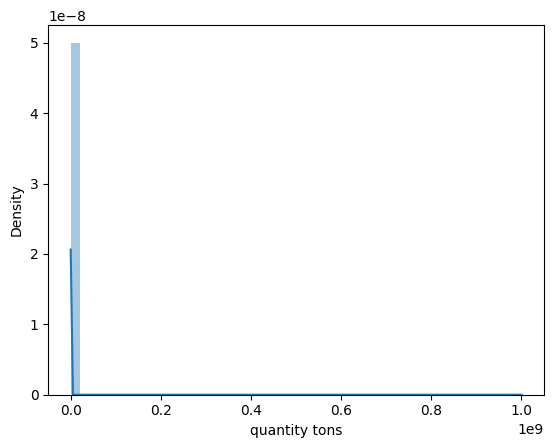

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


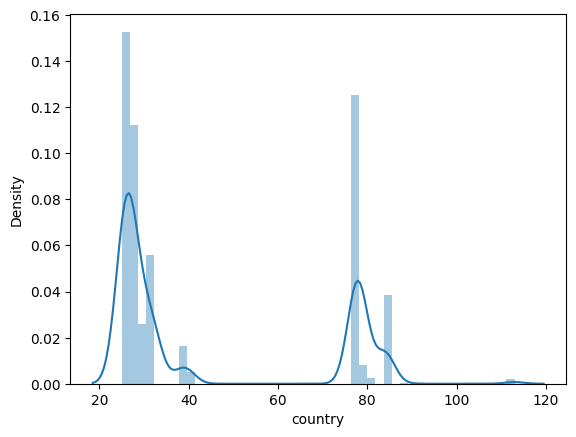

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


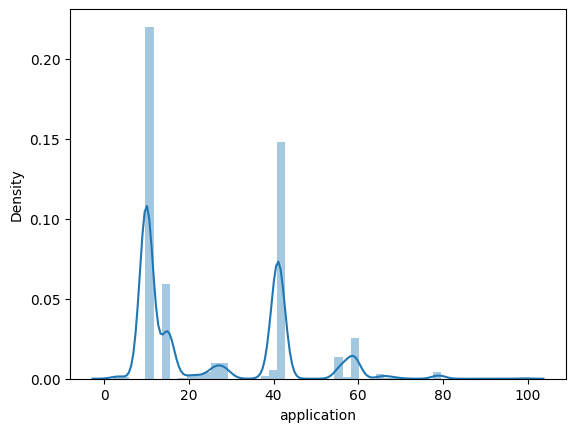

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


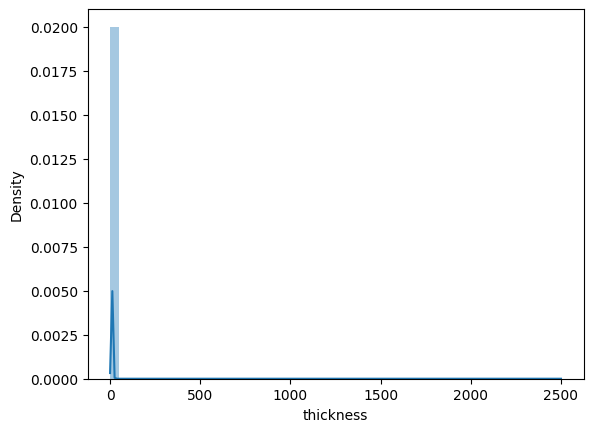

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


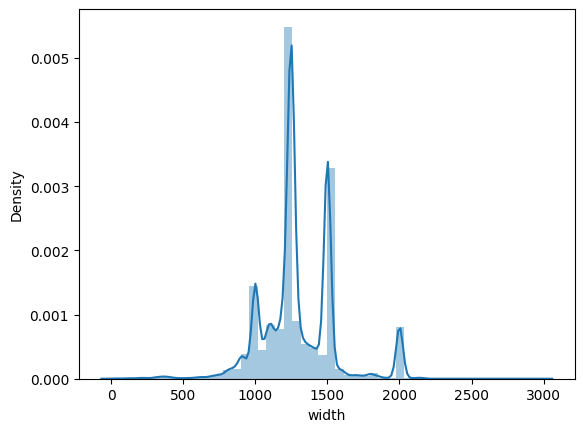

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


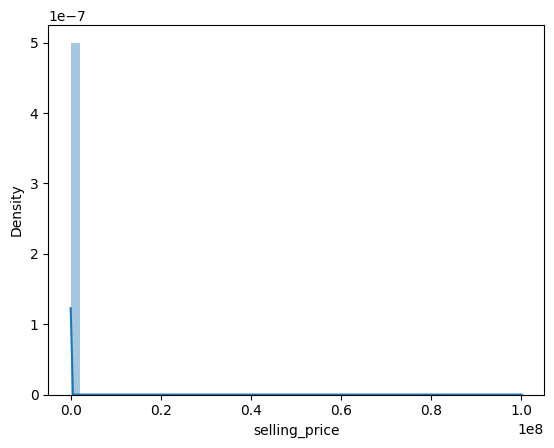

In [19]:
data1['quantity tons']   # skewed
data1['country']
data1['application']
data1['thickness']       # skewed
data1['width']           
data1['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data1['quantity tons'])
plt.show()
sns.distplot(data1['country'])
plt.show()
sns.distplot(data1['application'])
plt.show()
sns.distplot(data1['thickness'])
plt.show()
sns.distplot(data1['width'])
plt.show()
sns.distplot(data1['selling_price'])
plt.show()

In [44]:
import numpy as np
mask1 = data1['selling_price'] <= 0
print(mask1.sum())
data1.loc[mask1, 'selling_price'] = np.nan

mask1 = data1['quantity tons'] <= 0
print(mask1.sum())
data1.loc[mask1, 'quantity tons'] = np.nan

mask1 = data1['thickness'] <= 0
print(mask1.sum())

7
4
0


In [45]:
data1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [47]:
data1.dropna(inplace=True)
len(data1)

181620

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


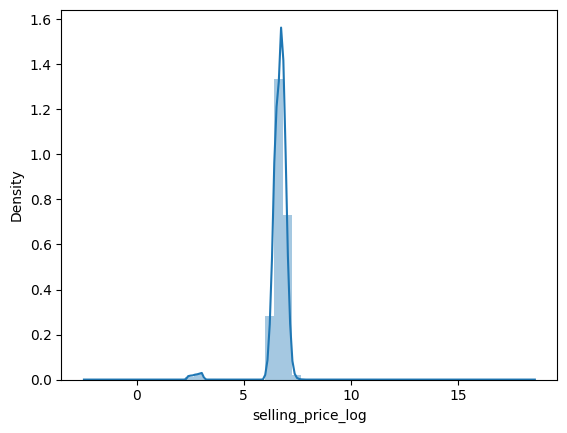

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


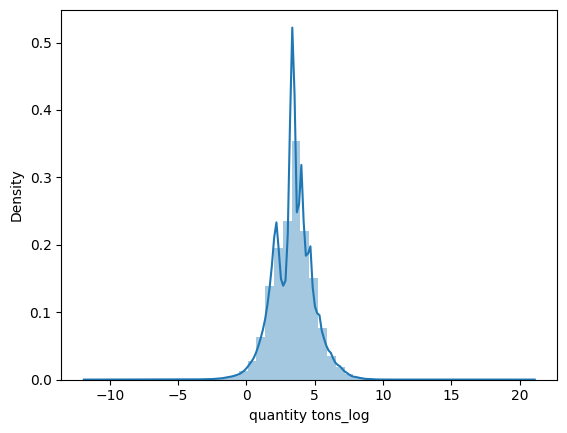

C:\Users\vishalachi\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


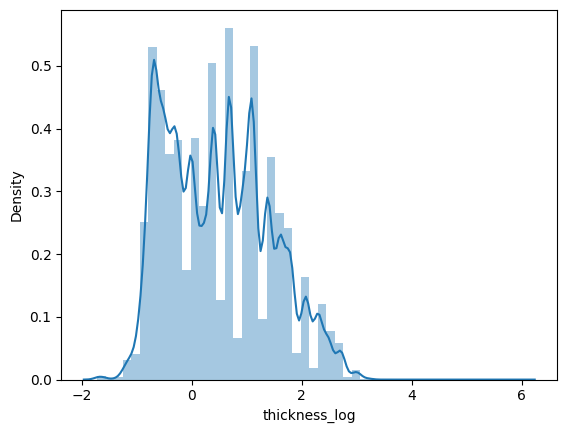

In [48]:
import numpy as np
data1['selling_price_log'] = np.log(data1['selling_price'])
sns.distplot(data1['selling_price_log'])
plt.show()

data1['quantity tons_log'] = np.log(data1['quantity tons'])
sns.distplot(data1['quantity tons_log'])
plt.show()

data1['thickness_log'] = np.log(data1['thickness'])
sns.distplot(data1['thickness_log'])
plt.show()

In [49]:
data1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


In [50]:
x=data1[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

In [52]:
x

,quantity tons_log,application,thickness_log,width,selling_price_log,country,customer,product_ref
quantity tons_log,1.000000,0.063991,0.042005,0.034431,0.023898,-0.088899,0.080141,0.064064
application,0.063991,1.000000,-0.197563,-0.204451,0.022665,-0.019334,0.000895,-0.131871
thickness_log,0.042005,-0.197563,1.000000,0.387243,-0.154999,-0.065203,0.079971,0.234330
width,0.034431,-0.204451,0.387243,1.000000,-0.069453,0.055286,0.050527,-0.034428
selling_price_log,0.023898,0.022665,-0.154999,-0.069453,1.000000,-0.029110,0.008731,0.001181
country,-0.088899,-0.019334,-0.065203,0.055286,-0.029110,1.000000,0.083574,-0.147370
customer,0.080141,0.000895,0.079971,0.050527,0.008731,0.083574,1.000000,-0.032331
product_ref,0.064064,-0.131871,0.234330,-0.034428,0.001181,-0.147370,-0.032331,1.000000


<Axes: >

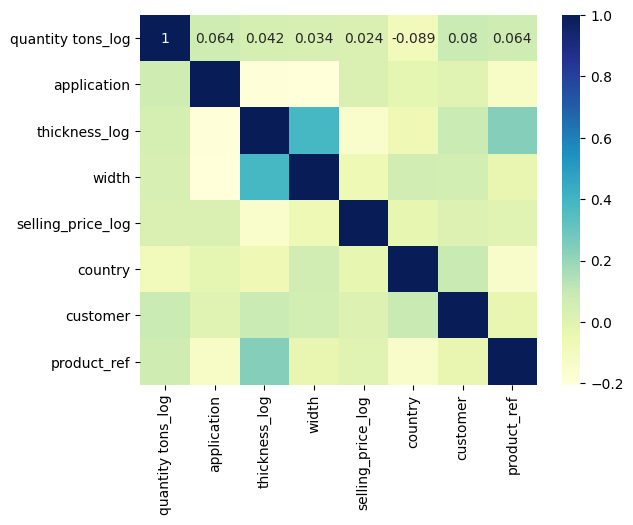

In [51]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

# Encoding 

In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [54]:
X=data1[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=data1['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(163458, 23) (18162, 23) (163458,) (18162,)


In [57]:
X_train

array([[ 0.37569784,  0.8665426 , -1.25686937, ..., -0.15323927,
        -1.32950556, -0.00234649],
       [ 0.69046893, -0.87956189, -0.27533141, ..., -0.15323927,
        -1.32950556, -0.00234649],
       [-0.41799355, -0.59793214,  2.14748731, ..., -0.15323927,
         0.75215932, -0.00234649],
       ...,
       [ 0.44036283,  1.71143188, -1.00930064, ..., -0.15323927,
         0.75215932, -0.00234649],
       [-0.5385811 , -0.59793214, -1.06156506, ..., -0.15323927,
        -1.32950556, -0.00234649],
       [ 0.4346164 , -0.87956189, -0.62722759, ..., -0.15323927,
         0.75215932, -0.00234649]])

In [58]:
X_test

array([[ 1.55725941e+00,  8.66542604e-01, -3.19060254e-01, ...,
        -1.53239271e-01, -1.32950556e+00, -2.34649352e-03],
       [-5.58931358e-01,  3.00692876e+00, -1.06156506e+00, ...,
        -1.53239271e-01, -1.32950556e+00, -2.34649352e-03],
       [-1.08423432e+00, -8.79561894e-01, -3.19060254e-01, ...,
        -1.53239271e-01,  7.52159322e-01, -2.34649352e-03],
       ...,
       [ 2.76584935e-01,  8.66542604e-01, -5.14364564e-01, ...,
        -1.53239271e-01, -1.32950556e+00, -2.34649352e-03],
       [ 1.32058910e+00, -8.79561894e-01,  2.28140240e-01, ...,
        -1.53239271e-01, -1.32950556e+00, -2.34649352e-03],
       [-7.07645418e-01,  8.66542604e-01,  2.85493537e-01, ...,
        -1.53239271e-01,  7.52159322e-01, -2.34649352e-03]])

# DECISION TREE REGRESSOR

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [65]:
# decision tree
dt_regressor = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator= dt_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vishalachi\

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [66]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.02625473494295307
R-squared: 0.9185068373072075


In [67]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [783.04274138]


C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [68]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [70]:
print(len(data1))
data1.head(3)

181620


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [75]:
data2 = data1[data1['status'].isin(['Won', 'Lost'])]
len(data2)

150427

# DECISION TREE CLASSIFIER

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer

In [76]:
Y = data2['status']
X= data2[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9114870703981919
Confusion Matrix:
[[ 5670  1332]
 [ 1331 21753]]


Confusion Matrix:
[[ 5670  1332]
 [ 1331 21753]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



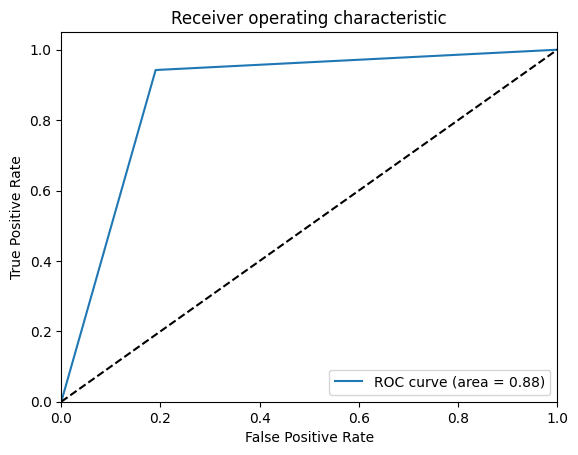

In [80]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [82]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dt_classifier.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


C:\Users\vishalachi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [84]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)